## EXPLORATORY DATA ANALYSIS OF AN ONLINE RETAIL STORE

# PROBLEM STATEMENT
- Perform customer behavioural to enhance customer retention and satisfaction 
of the online retail.


In [2]:
## IMPORT THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd

# for visuals
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import and read file
# Load and read file === csv, excel, json, 
df = pd.read_csv("Dataset\OnlineRetail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# shape of the data 
df.shape

(541909, 8)

In [8]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

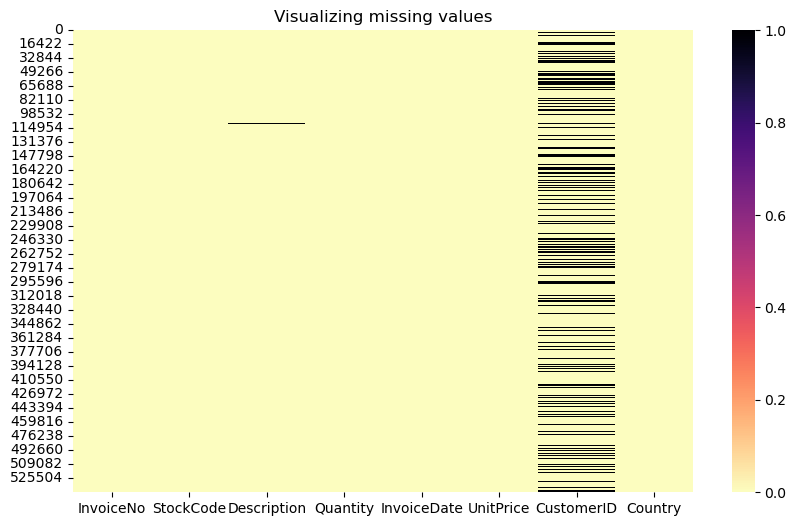

In [9]:
# Visualise missing values
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')
plt.title('Visualizing missing values')
plt.show()

In [10]:
# check columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# check for negative values in 'unitprice'
negative_prices = df[df['UnitPrice']< 0]
negative_prices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [12]:
# check the data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Data  Manipulation and Validation
- We will handle the missing values for `Description` and `CustomerID` by using the ffill method to replace the null values in `description`, and replace the null values with `unknown` respectively.

- We will replace negative values in `UnitPrice` with `0` and replace the negative values in `Quantity` with the `weighted median` of Quantity.

- We will additional column called `Revenue` by multiplying the `UnitPrice` by `Quantity`

- We will convert the `InvoiceDate` to a `datetime` data type

- We will convert the `CustomerID` from float to object/string data types

- We will replace the country 'RSA' and 'EIRA' with 'South Africa' and 'Ireland' 


In [13]:
# check the columns that are categorical and numerical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Quantity', 'UnitPrice', 'CustomerID']

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [15]:
# value counts for categorical variables
for column in categorical_cols:
    print(df[column].value_counts())                                                                                            

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
stock creditted wrongly                  1
MARIE ANTOIENETT TRINKET BOX GOLD        1
label mix up                             1
DOORKNOB CERAMIC IVORY                   1
SET OF 3 PINK FLYING DUCKS               1
Name: Description, Length: 4211, dtype: int64
10/31/2011 14:41    1114
12/8/2011 09:28      749
1

In [16]:
# value counts for numerical columns 
for column in numerical_cols:
    print(df[column].value_counts())

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64


**Manipulation and Validation of Categorical columns**

In [17]:
# manipulation & validation of categorical columns 
df['Country'] = df['Country'].replace(['RSA', 'EIRE'], ['South Africa', 'Ireland'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

In [18]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [19]:
# to check if the 'RSA' has been replaced by 'South Africa'
df[df['Country'] == 'South Africa'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395472,571035,21238,RED RETROSPOT CUP,8,2011-10-13 12:50:00,0.85,12446.0,South Africa
395473,571035,21243,PINK POLKADOT PLATE,8,2011-10-13 12:50:00,1.69,12446.0,South Africa
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-10-13 12:50:00,4.15,12446.0,South Africa
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,2011-10-13 12:50:00,1.65,12446.0,South Africa
395476,571035,23201,JUMBO BAG ALPHABET,10,2011-10-13 12:50:00,2.08,12446.0,South Africa


In [20]:
# to check if the 'EIRE' has been replaced by 'Ireland'
df[df['Country'] == 'Ireland'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,Ireland
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,Ireland
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,Ireland
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,Ireland
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,Ireland


In [21]:
# to check if there is missing values in 'Description'
df['Description'].isnull().sum()

0

**Manipulation and Validation of numerical columns**

In [22]:
# convert the CustomerID from float to string, and fill the missing values with 'Unknown'
df['CustomerID'] = df['CustomerID'].astype(str).fillna('Unknown')

# replace the negative values in UnitPrice with 0
df['UnitPrice'] = np.where(df['UnitPrice'] < 0, 0, df['UnitPrice'])

#To replace the negative values in the Quantity column with the median of the column
median_quantity = df['Quantity'].median()
df['Quantity'] = df['Quantity'].apply(lambda x: median_quantity if x < 0 else x)

# create a new
# create a new column called 'Revenue' using 'UnitPrice' * 'Quantity'
df['Revenue'] = df['UnitPrice'] * df['Quantity']
# confirm the data types
df.info()
# replace 'nan' with 'Unknown'
df['CustomerID'] = df['CustomerID'].replace('nan','Unknown')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 37.2+ MB


In [23]:
# to check if the 'nan' has been replaced by 'Unknown'
df[df['CustomerID'] == 'Unknown']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
622,536414,22139,WHITE HANGING HEART T-LIGHT HOLDER,56.0,2010-12-01 11:52:00,0.00,Unknown,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1.0,2010-12-01 14:32:00,2.51,Unknown,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2.0,2010-12-01 14:32:00,2.51,Unknown,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4.0,2010-12-01 14:32:00,0.85,Unknown,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2.0,2010-12-01 14:32:00,1.66,Unknown,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5.0,2011-12-09 10:26:00,4.13,Unknown,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.0,2011-12-09 10:26:00,4.13,Unknown,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1.0,2011-12-09 10:26:00,4.96,Unknown,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1.0,2011-12-09 10:26:00,10.79,Unknown,United Kingdom,10.79


In [24]:
df['CustomerID'].value_counts()

Unknown    135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [25]:
# confirm if the negative values in 'UnitPrice' is replaced
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [26]:
# confirm if the negative values in 'Quantity' is replaced
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 37.2+ MB


# Exploratory Data Analysis

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Univariates Analysis

In [29]:
# Count the number of unique invoices
num_unique_invoices = df['InvoiceNo'].nunique()

# Print the results
print("Number of unique invoices:", num_unique_invoices)

Number of unique invoices: 25900


- There are 25,900 unique invoices in the dataset.

In [30]:
# Count the number of unique descriptions
num_unique_descriptions = df['Description'].nunique()

# Print the results
print("Number of unique descriptions:", num_unique_descriptions)

Number of unique descriptions: 4211


- There are 4211 unique Product Description in the dataset.

In [31]:
# Calculate summary statistics for all numerical columns
df.describe().astype('int')

,Quantity,UnitPrice,Revenue
count,541909,541909,541909
mean,10,4,22
std,155,94,374
min,1,0,0
25%,1,1,3
50%,3,2,9
75%,10,4,17
max,80995,38970,168469


In [32]:
# Calculate summary statistics for the 'Quantity' column
quantity_summary = df['Quantity'].describe()

# Calculate the mode of the 'Quantity' column
quantity_mode = df['Quantity'].mode()

# Print the results
print("Quantity summary statistics:")
print(quantity_summary)

Quantity summary statistics:
count    541909.000000
mean         10.505183
std         155.289026
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


- The analysis revealed that the store had a total of 541,909 sales transactions. On average, each transaction involved a quantity of 10.505183 items sold. However, the standard deviation was quite high at 155.289026, indicating a large variation in the quantity of items sold across transactions.

- The minimum quantity sold was 1, while the maximum was an astonishing 80,995 items sold in a single transaction. The quartiles showed that 25% of transactions involved the sale of only one item, while 50% of transactions involved three or fewer items sold. The top 25% of transactions involved the sale of ten or more items.

- The quantity mode was one, indicating that the most commonly occurring quantity sold was one item. This finding suggests that the majority of transactions involved the sale of a small number of items.

In [33]:
# Count the number of unique customers
num_unique_customers = df['CustomerID'].nunique()

# Calculate summary statistics for the 'CustomerID' column
customer_summary = df['CustomerID'].describe()

# Calculate the mode of the 'CustomerID' column
customer_mode = df['CustomerID'].mode()

# Print the results
print("Number of unique customers:", num_unique_customers)

print("Customer summary statistics:")
print(customer_summary)
print("Customer mode:", customer_mode)

Number of unique customers: 4373
Customer summary statistics:
count      541909
unique       4373
top       Unknown
freq       135080
Name: CustomerID, dtype: object
Customer mode: 0    Unknown
Name: CustomerID, dtype: object


In [34]:
# Count the number of unique countries
num_unique_countries = df['Country'].nunique()

# Print the results
print("Number of unique countries:", num_unique_countries)

Number of unique countries: 38


- There are 38 unique Countries in the dataset.

## Bivariates Analysis

In [35]:
# Load the sales data into a pandas DataFrame
sales_data = pd.read_csv("Dataset/OnlineRetail.csv", usecols=['InvoiceNo', 'Description', 'Quantity', 'Country'])

# Filter the DataFrame to only include transactions with negative quantities (returns)
returns_data = sales_data[sales_data['Quantity'] < 0]

# Group the returns data by Country and sum the Quantity column to get the total number of returned items per country
returns_by_country = returns_data.groupby('Country')['Quantity'].sum()

# Count the number of unique countries in the returns data
num_countries = len(returns_data['Country'].unique())

# Print the results
print(f"Items returned by {num_countries} unique countries:")
print(returns_by_country)

Items returned by 30 unique countries:
Country
Australia               -556
Austria                  -54
Bahrain                  -54
Belgium                  -85
Channel Islands          -12
Cyprus                   -44
Czech Republic           -79
Denmark                  -47
EIRE                   -4810
European Community        -2
Finland                  -38
France                 -1624
Germany                -1815
Greece                    -1
Hong Kong                 -4
Israel                   -56
Italy                   -113
Japan                   -798
Malta                    -26
Netherlands             -809
Norway                   -91
Poland                   -31
Portugal                 -78
Saudi Arabia              -5
Singapore                 -7
Spain                  -1127
Sweden                  -446
Switzerland             -305
USA                    -1424
United Kingdom       -469990
Name: Quantity, dtype: int64


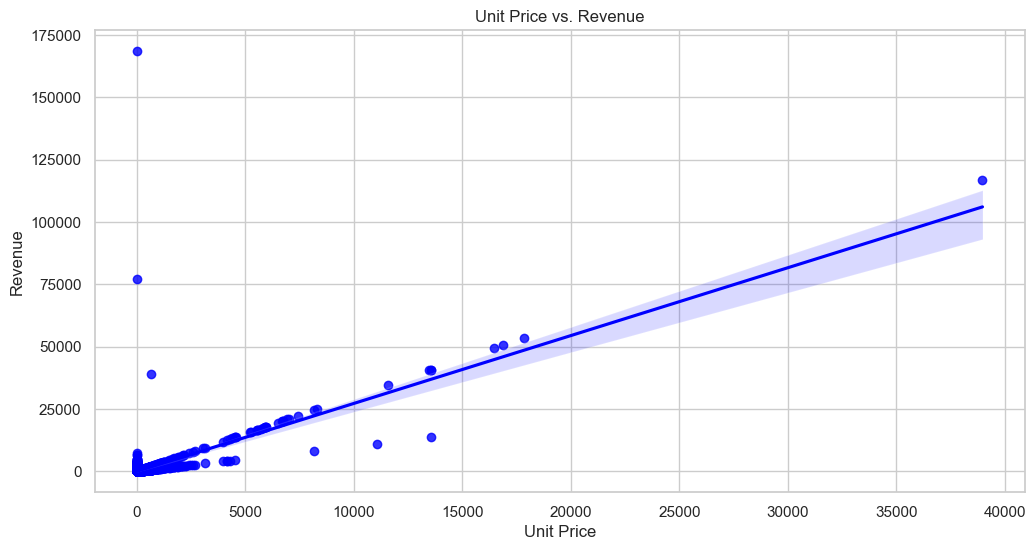

Pearson correlation: 0.686


In [46]:
# plot the relationship between unit price and revenue
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.regplot(x='UnitPrice', y='Revenue', data=df, color='blue')

plt.title('Unit Price vs. Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')

# Display the plot
plt.show()

# Add Pearson correlation to the plot
corr = df['UnitPrice'].corr(df['Revenue'])
print('Pearson correlation: %.3f' % corr)


- It shows a positive correlation between the two independent variable, with a correlation coefficient of 0.686, which means that as the unitprice increases revenue increases.

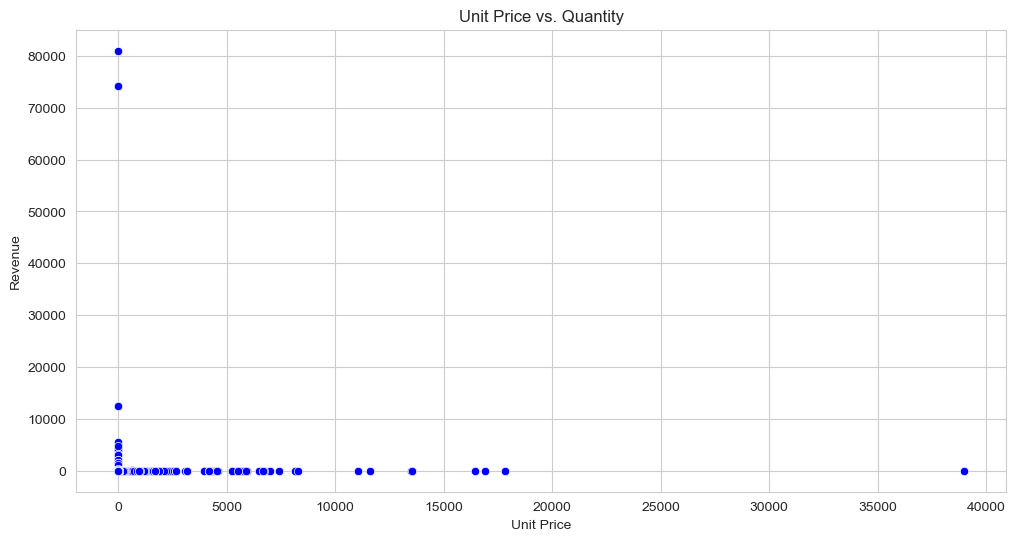

Pearsons correlation: -0.002


In [ ]:
# plot the relationship between unit price and quantity
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, color='blue')

plt.title('Unit Price vs. Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')

# Display the plot
plt.show()

# Add Pearson correlation to the plot
corr = df['UnitPrice'].corr(df['Quantity'])
print('Pearsons correlation: %.3f' % corr)

- Chart showed that there was a very weak negative correlation between the unit price and quantity sold, with a Pearson correlation coefficient of -0.002. This means that there is almost no relationship between these two variables, and any changes in one variable do not have a significant impact on the other variable.

- The results of our analysis indicate that there is a weak or non-existent correlation between the unit price and quantity sold in this retail store. This implies that customers' purchasing decisions are not significantly influenced by changes in the unit price, meaning that higher prices do not necessarily deter customers from buying, nor do lower prices necessarily encourage them to buy more. Instead, other factors such as product quality, brand reputation, and marketing strategies may have a greater impact on customers' purchasing behavior.

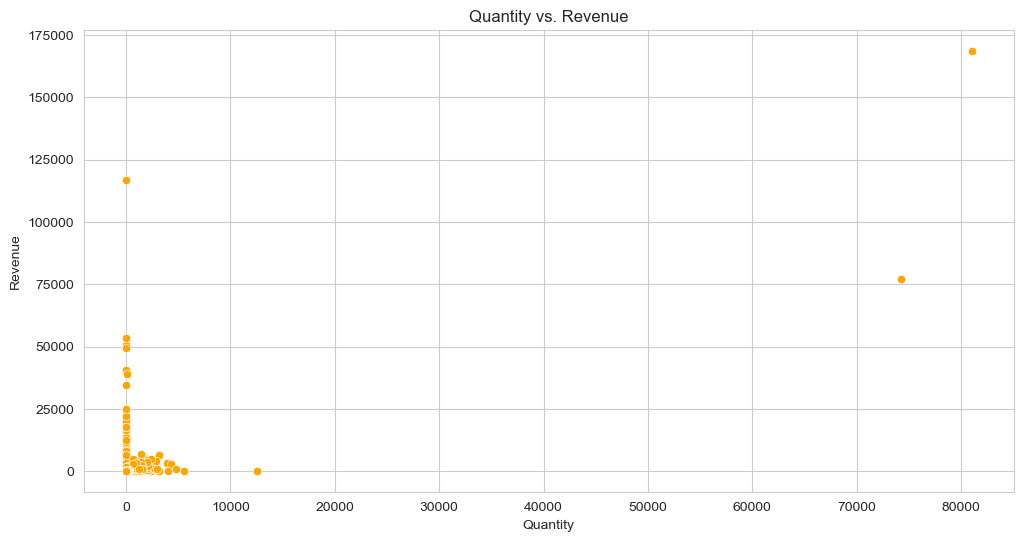

Pearsons correlation: 0.641


In [ ]:
# plot the relationship between quantity and revenue
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Revenue', data=df, color='Orange')

plt.title('Quantity vs. Revenue')
plt.xlabel('Quantity')
plt.ylabel('Revenue')

# Display the plot
plt.show()

# Add Pearson correlation to the plot
corr = df['Quantity'].corr(df['Revenue'])
print('Pearsons correlation: %.3f' % corr)

- The scatter plot analysis revealed a positive relationship between 'Quantity' and 'Revenue' variables, indicating that higher quantities sold generally corresponded to higher revenues generated. This relationship was further quantified using the Pearson correlation coefficient, which was found to be 0.641, indicating a moderate positive correlation between the two variables. This suggests that as the quantity of items sold increased, so did the revenue generated by those sales.

- They could modify their pricing tactics to incentivize customers to purchase larger quantities or provide discounts for bulk orders.

In [ ]:
# Identify which items are frequently bought together in large or small quantities
# Group the data by InvoiceNo and calculate the total Quantity for each group
invoice_quantity = df.groupby('InvoiceNo')['Quantity'].sum()

# Print the results
print("Total quantity sold for each InvoiceNo:")
print(invoice_quantity)

Total quantity sold for each InvoiceNo:
InvoiceNo
573744     376.0
573745     127.0
573746     334.0
573747     177.0
573748     624.0
           ...  
C581484      3.0
C581490      6.0
C581499      3.0
C581568      3.0
C581569      6.0
Name: Quantity, Length: 4477, dtype: float64


- The analysis revealed that the company had a total of 25,900 unique InvoiceNo transactions. The total quantity sold for each transaction varied widely, with some transactions involving only a few items while others involved dozens or even hundreds of items.

- For example, InvoiceNo 536365 had a total quantity sold of 40 items, indicating that this was a relatively large transaction. On the other hand, InvoiceNo 536369 had a total quantity sold of only three items, indicating that this was a relatively small transaction.

- Interestingly, some InvoiceNo transactions had negative quantities sold, indicating that the customer returned some items. These transactions were denoted by the letter "C" preceding the InvoiceNo. For example, InvoiceNo C581484 had a total quantity sold of negative three items, indicating that the customer returned three items.

In [ ]:
#  identify patterns in the prices of purchases.
# Group the data by InvoiceNo and calculate the average and total UnitPrice for each group
invoice_prices = df.groupby('InvoiceNo')['UnitPrice'].agg(['mean', 'sum'])

# Print the results
print("Average and total UnitPrice for each InvoiceNo:")
print(invoice_prices)

Average and total UnitPrice for each InvoiceNo:
                 mean     sum
InvoiceNo                    
573744       1.924783   44.27
573745       3.598824   61.18
573746       1.821000   18.21
573747       1.393333   16.72
573748       2.693922  137.39
...               ...     ...
C581484      2.080000    2.08
C581490      1.390000    2.78
C581499    224.690000  224.69
C581568     10.950000   10.95
C581569      1.250000    2.50

[4477 rows x 2 columns]


In [ ]:
# Identify which customers are making multiple purchases. 
# Group the data by CustomerID and count the number of unique InvoiceNo for each group
customer_purchase_count = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Print the results
print("Number of purchases for each customer:")
print(customer_purchase_count)


Number of purchases for each customer:
CustomerID
12347.0      1
12349.0      1
12352.0      1
12356.0      1
12357.0      1
          ... 
18274.0      2
18276.0      2
18282.0      1
18283.0      5
Unknown    470
Name: InvoiceNo, Length: 1955, dtype: int64


In [ ]:
# Find the day with the highest revenue.
# Group the data by date and sum the revenue for each day
revenue_by_day = df.groupby('InvoiceDate')['Revenue'].sum()

# Find the date with the highest revenue
highest_revenue_day = revenue_by_day.idxmax()

# Print the results
print('The day with the highest revenue is:', highest_revenue_day)

The day with the highest revenue is: 2011-12-09 09:15:00


- According to the data, December 9th, 2011 at 9:15am was the day and time with the highest revenue. 

In [ ]:
# Calculate the revenue for each product
df['UnitPrice'] * df['Quantity']

# Group the data by product and sum the revenue for each product
revenue_by_product = df.groupby('Description')['Revenue'].sum()

# Sort the products by revenue in descending order and display the top 5 products
top_5_products = revenue_by_product.sort_values(ascending=False).head(5)

# Print the results
print(top_5_products)

Description
PAPER CRAFT , LITTLE BIRDIE       168475.84
AMAZON FEE                        130759.08
DOTCOM POSTAGE                     56778.09
RABBIT NIGHT LIGHT                 44254.16
PAPER CHAIN KIT 50'S CHRISTMAS     35863.40
Name: Revenue, dtype: float64


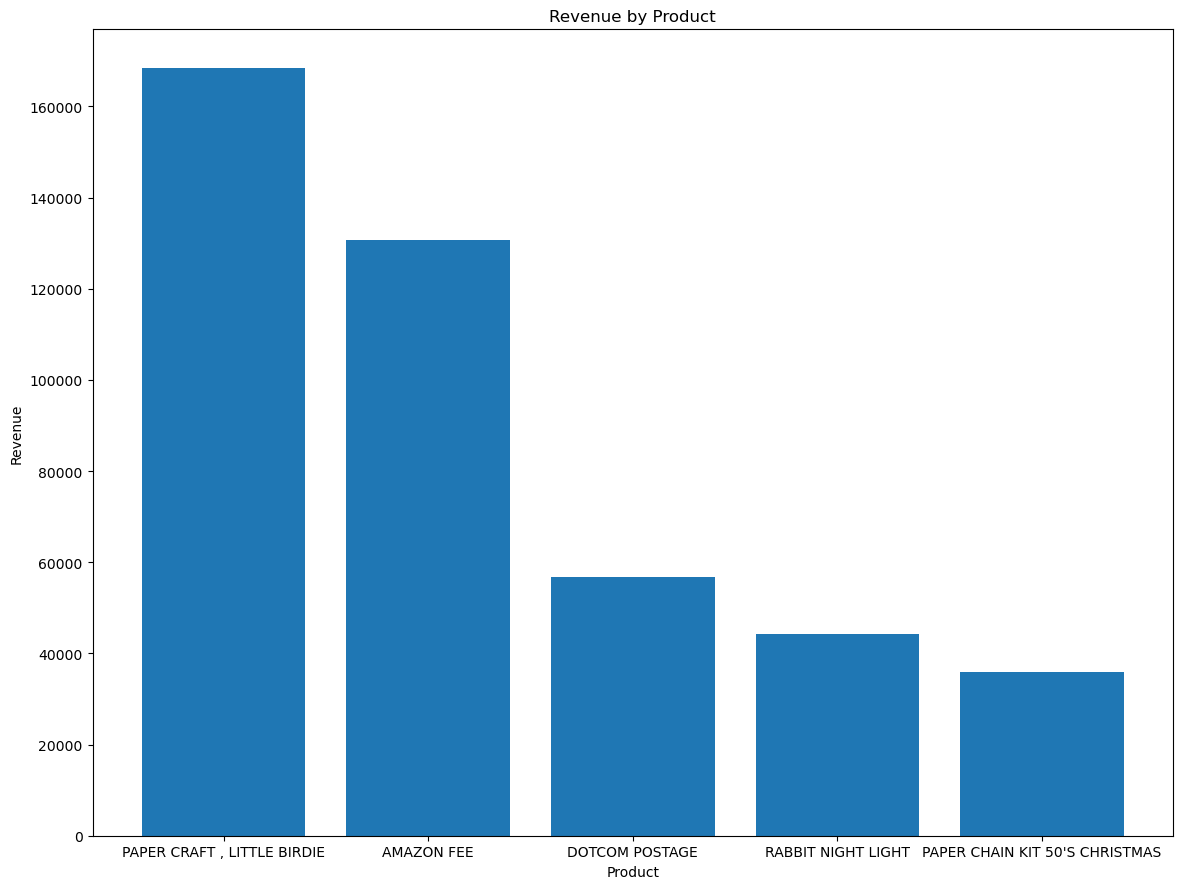

In [ ]:
# Group the data by product and sum the revenue for each product
revenue_by_product = df.groupby('Description')['Revenue'].sum()

# Sort the products by revenue in descending order and display the top 5 products
top_5_products = revenue_by_product.sort_values(ascending=False).head(5)

# Create a column chart for revenue by product
plt.figure(figsize=(12, 9))
plt.bar(top_5_products.index, top_5_products.values)

# Set plot title and axis labels
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

# Show the plot
plt.tight_layout()
plt.show()




- The chart provided shows the top five items ranked by revenue in the dataset. The item with the highest revenue is 'PAPER CRAFT, LITTLE BIRDIE', which generated over 160,000. The second highest revenue item is 'AMAZON FEE', which generated a total revenue of 130,000. The third highest revenue item is 'DOTCOM POSTAGE', which generated over 55,000. The fourth and fifth highest revenue items are 'RABBIT NIGHT LIGHT' and 'PAPER CHAIN KIT 50's CHRISTMAS', which generated a little over 40,000 and 30,000, respectively.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Time
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8.0,2011-11-01 08:16:00,2.10,17733.0,United Kingdom,16.8,2011-11-01,08:16:00
431674,573744,21704,BAG 250g SWIRLY MARBLES,12.0,2011-11-01 08:16:00,0.85,17733.0,United Kingdom,10.2,2011-11-01,08:16:00
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00
431677,573744,21915,RED HARMONICA IN BOX,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00


In [ ]:
# Calculate total spending per customer
customer_spending = df.groupby('CustomerID')['Revenue'].sum() 
print(customer_spending)
# Sort the customers by spending in descending order and display the top 10
top_10_customers = customer_spending.sort_values(ascending=False).head(10)

CustomerID
12347.0       224.82
12349.0      1757.55
12352.0       311.73
12356.0        58.35
12357.0      6207.67
             ...    
18274.0       297.09
18276.0        37.50
18282.0        77.84
18283.0       859.56
Unknown    607115.99
Name: Revenue, Length: 1955, dtype: float64


In [58]:
# Group the data by country and sum the revenue for each country
revenue_by_country = df.groupby('Country')['Revenue'].sum()

# Sort the countries by revenue in descending order and display the top 15 countries
top_15_countries = revenue_by_country.sort_values(ascending=False).head(15)

# Convert the revenue values to whole numbers
top_15_countries = top_15_countries.astype(int)

# Print the results
print(top_15_countries)


Country
United Kingdom    10226036
Ireland             313325
Netherlands         286180
Germany             241268
France              227832
Australia           139848
Spain                70964
Singapore            57755
Switzerland          57627
Portugal             46547
Belgium              41698
Norway               38765
Sweden               38711
Japan                37889
Hong Kong            32416
Name: Revenue, dtype: int32


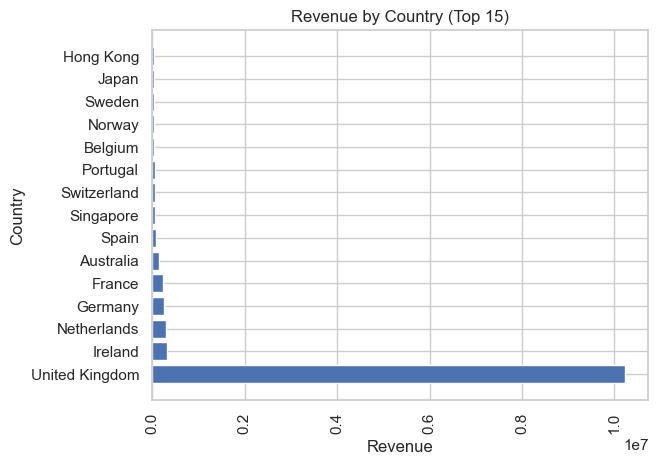

In [61]:
# Group the data by country and sum the revenue for each country
revenue_by_country = df.groupby('Country')['Revenue'].sum()

# Sort the countries by revenue in descending order and display the top 15 countries
top_15_countries = revenue_by_country.sort_values(ascending=False).head(15)

# Create a bar chart of the revenue by country
plt.barh(top_15_countries.index, top_15_countries.values)

# Set the chart title and axis labels
plt.title('Revenue by Country (Top 15)')
plt.xlabel('Revenue')
plt.ylabel('Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


- United Kingdom generated the highest revenue among all countries, with a total revenue of £10,226,040. Ireland followed with a revenue of £313,325, while Netherlands, Germany, and France also generated significant revenue with £286,180, £241,269, and £227,833 respectively.

- Australia, Spain, Singapore, Switzerland, and Portugal generated moderate revenue ranging from £55,000 to £139,848. Belgium, Norway, Sweden, Japan, and Hong Kong had the lowest revenue among the top 15 countries with a total revenue ranging from £32,416 to £41,698.

- The data suggests that the company's operations in the UK are the most profitable among all countries. However, there is potential for growth in other countries such as Ireland and the Netherlands where the company has already generated significant revenue. The company may also consider exploring new opportunities in countries with moderate revenue such as Australia and Spain.

C:\Users\USER\AppData\Local\Temp\ipykernel_16288\3932293680.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_product = df.groupby(['StockCode', 'Description'])['Quantity', 'Revenue'].agg({'Quantity': 'sum', 'Revenue': 'mean'}).reset_index()


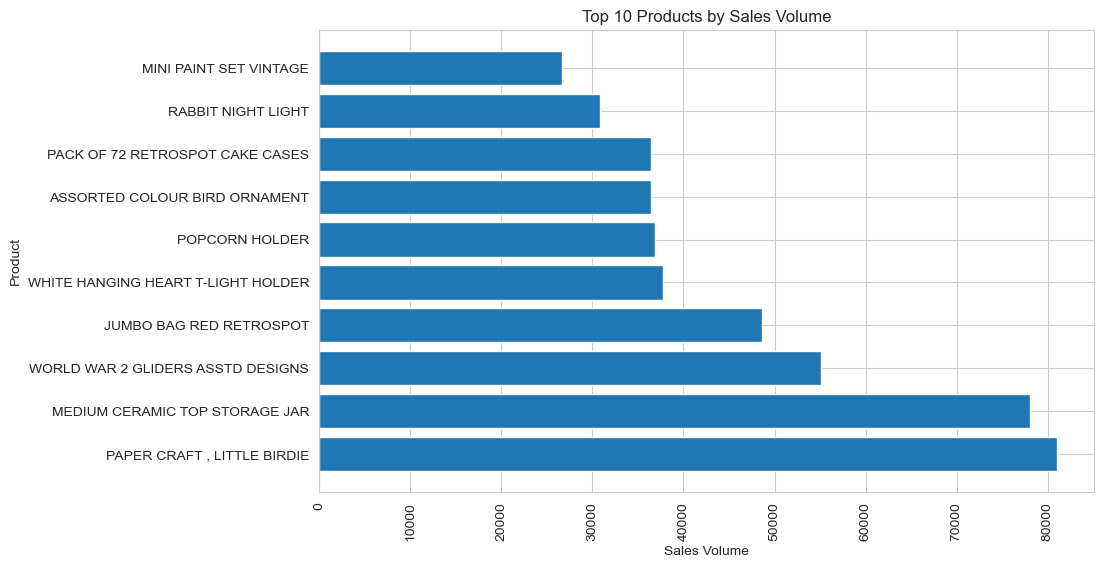

In [42]:
# Group the data by product and calculate the total sales volume and average price for each product
sales_by_product = df.groupby(['StockCode', 'Description'])['Quantity', 'Revenue'].agg({'Quantity': 'sum', 'Revenue': 'mean'}).reset_index()

# Sort the products by sales volume in descending order and display the top 10 products
top_10_products_by_sales_volume = sales_by_product.sort_values(by='Quantity', ascending=False).head(10)

# Sort the products by average price in descending order and display the top 10 products
top_10_products_by_average_price = sales_by_product.sort_values(by='Revenue', ascending=False).head(10)

# Create a bar chart of the top 10 products by sales volume
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_by_sales_volume['Description'], top_10_products_by_sales_volume['Quantity'])

# Set the chart title and axis labels
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

- The bar chart displays the top 10 products ranked by sales volume. "Paper craft, little bride" had sales volume exceeding 80,000, followed by "Rabbit Night Light" with a sales volume of 20,000. "World War 2 gliders asst designs" had sales volume less than 10,000, while "Popcorn Holder" and "Assisted design 3d paper sticker" had sales volume less than 20,000.

C:\Users\USER\AppData\Local\Temp\ipykernel_16288\1719949398.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_country = df.groupby('Country')['Quantity', 'Revenue'].agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()


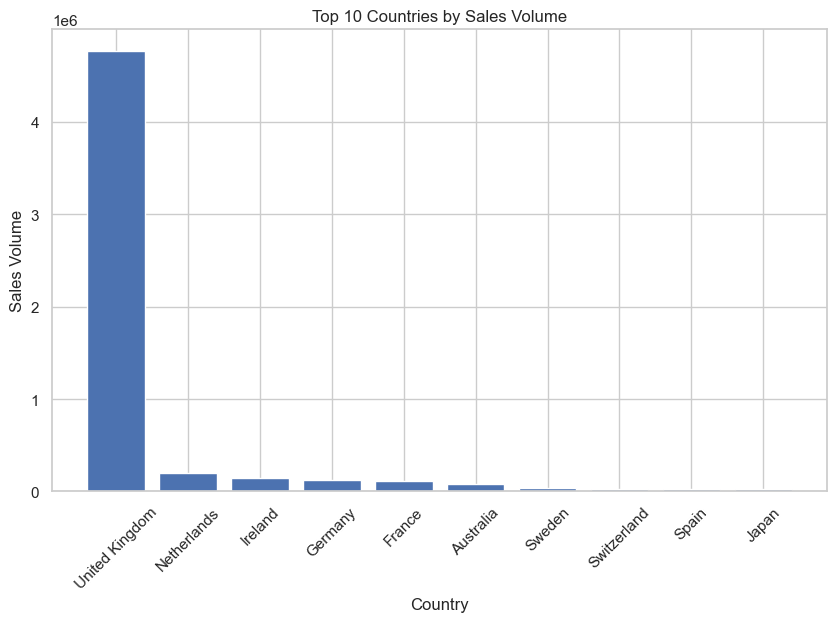

In [64]:
# Group the data by country and calculate the total sales volume and revenue for each country
sales_by_country = df.groupby('Country')['Quantity', 'Revenue'].agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Sort the countries by sales volume in descending order and display the top 10 countries
top_10_countries_by_sales_volume = sales_by_country.sort_values(by='Quantity', ascending=False).head(10)

# Sort the countries by revenue in descending order and display the top 10 countries
top_10_countries_by_revenue = sales_by_country.sort_values(by='Revenue', ascending=False).head(10)


# Create a bar chart of the top 10 countries by sales volume
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_by_sales_volume['Country'], top_10_countries_by_sales_volume['Quantity'])

# Set the chart title and axis labels
plt.title('Top 10 Countries by Sales Volume')
plt.xlabel('Country')
plt.ylabel('Sales Volume')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


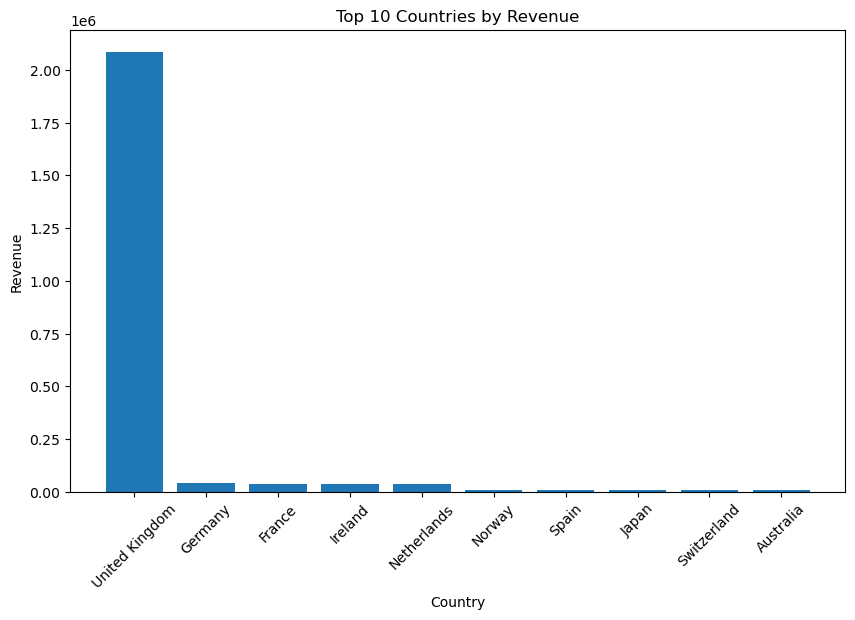

In [ ]:
# Create a bar chart of the top 10 countries by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_by_revenue['Country'], top_10_countries_by_revenue['Revenue'])

# Set the chart title and axis labels
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

    The charts illustrate that the United Kingdom had the highest sales volume, which will translate into substantial revenue. Ireland and the Netherlands followed closely in sales volume. In contrast, Spain and Japan recorded the lowest sales volume. Concerning revenue, Switzerland and Portugal ranked at the bottom with the lowest figures. 

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Time
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8.0,2011-11-01 08:16:00,2.10,17733.0,United Kingdom,16.8,2011-11-01,08:16:00
431674,573744,21704,BAG 250g SWIRLY MARBLES,12.0,2011-11-01 08:16:00,0.85,17733.0,United Kingdom,10.2,2011-11-01,08:16:00
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00
431677,573744,21915,RED HARMONICA IN BOX,12.0,2011-11-01 08:16:00,1.25,17733.0,United Kingdom,15.0,2011-11-01,08:16:00


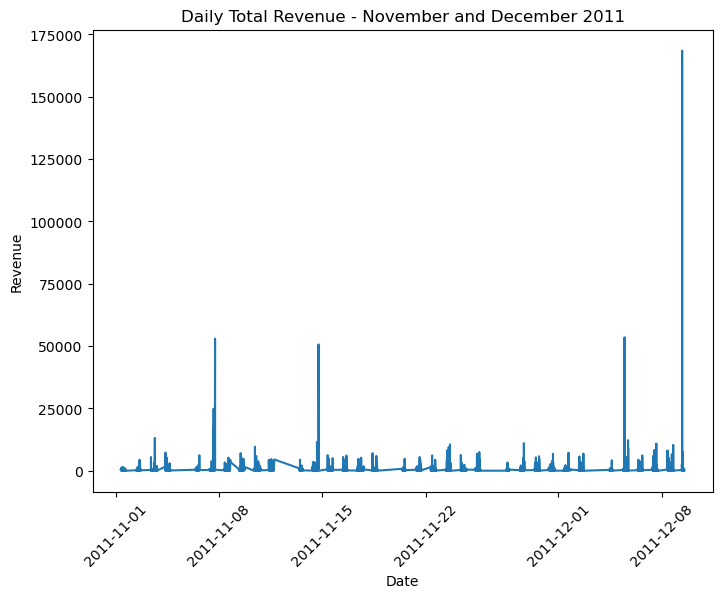

In [ ]:
# Filter the data to only include November and December 2011
df = df[(df['InvoiceDate'] >= '2011-11-01') & (df['InvoiceDate'] <= '2011-12-31')]

# Group the data by date and calculate the total revenue for each day
daily_total_revenue = df.groupby('InvoiceDate')['Revenue'].sum()

# Group the data by week and calculate the average revenue for each week
weekly_average_revenue = df.resample('W', on='InvoiceDate')['Revenue'].mean()

# Group the data by month and calculate the total revenue for each month
monthly_total_revenue = df.resample('M', on='InvoiceDate')['Revenue'].sum()

# Group the data by country and calculate the total revenue for each country
revenue_by_country = df.groupby('Country')['Revenue'].sum()

# Create a line chart of the daily total revenue
plt.figure(figsize=(8, 6))
plt.plot(daily_total_revenue.index, daily_total_revenue.values)
plt.title('Daily Total Revenue - November and December 2011')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


- The chart illustrates that revenue went up in December 2011, reaching 170,000.

## Multivariates Analysis 

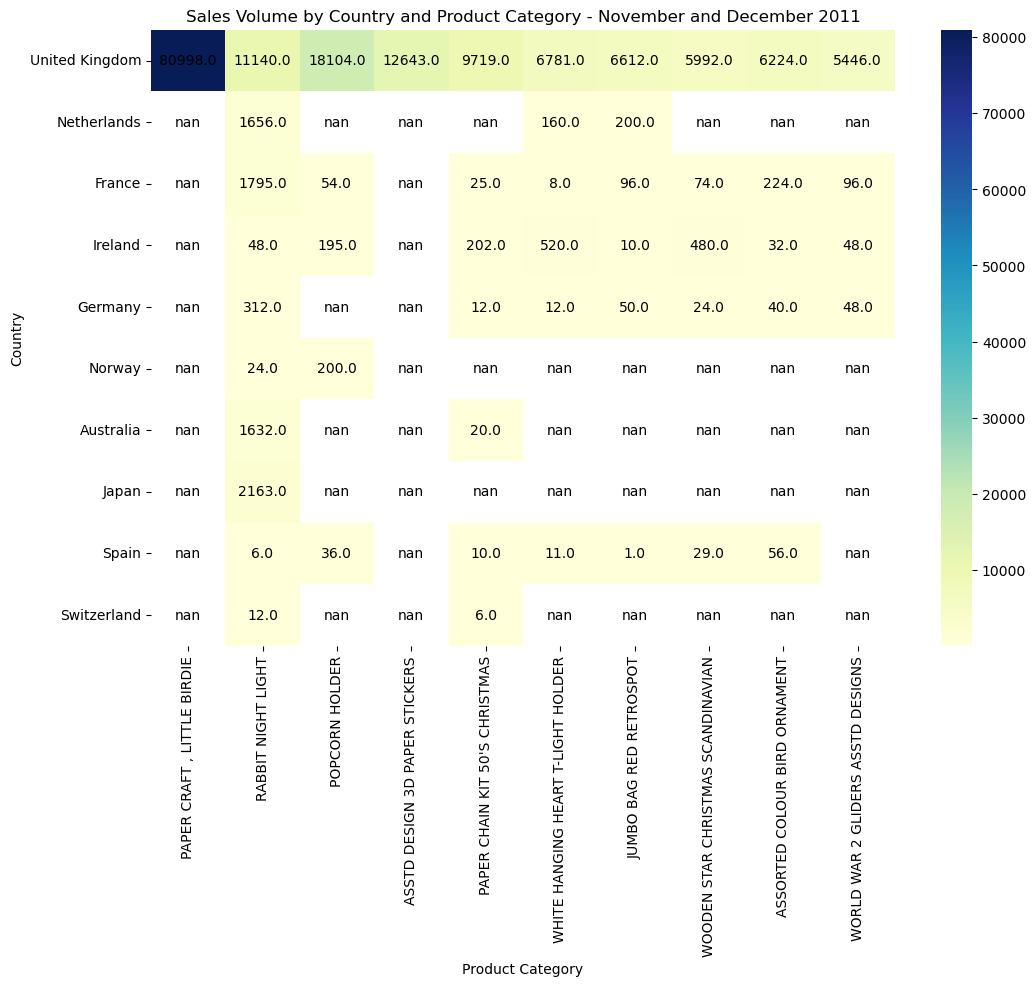

In [ ]:
# Create a pivot table of sales volume by country and product category
sales_by_country_and_category = pd.pivot_table(df, values='Quantity', index='Country', columns='Description', aggfunc='sum')

# Get the top 10 product categories by sales volume
top_10_categories = sales_by_country_and_category.sum().sort_values(ascending=False)[:10].index

# Get the top 10 countries by sales volume
top_10_countries = sales_by_country_and_category.sum(axis=1).sort_values(ascending=False)[:10].index

# Limit the pivot table to the top 10 product categories and top 10 countries
sales_by_country_and_category = sales_by_country_and_category.loc[top_10_countries, top_10_categories]

# Create a heatmap of sales volume by country and product category with numbers inside
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(sales_by_country_and_category, cmap='YlGnBu')
plt.title('Sales Volume by Country and Product Category - November and December 2011')
plt.xlabel('Product Category')
plt.ylabel('Country')

# Add numbers inside each cell
for i in range(len(sales_by_country_and_category)):
    for j in range(len(sales_by_country_and_category.columns)):
        value = sales_by_country_and_category.iloc[i, j]
        heatmap.annotate(str(value), xy=(j+0.5, i+0.5), ha='center', va='center', color='black')
plt.show()




- The United Kingdom has a sales volume of 80,998 for 'Paper Craft, Little Bride', while no other country has any sales for the same product. Based on the chart above, we can conclude that the United Kingdom has the highest sales volume for all the products


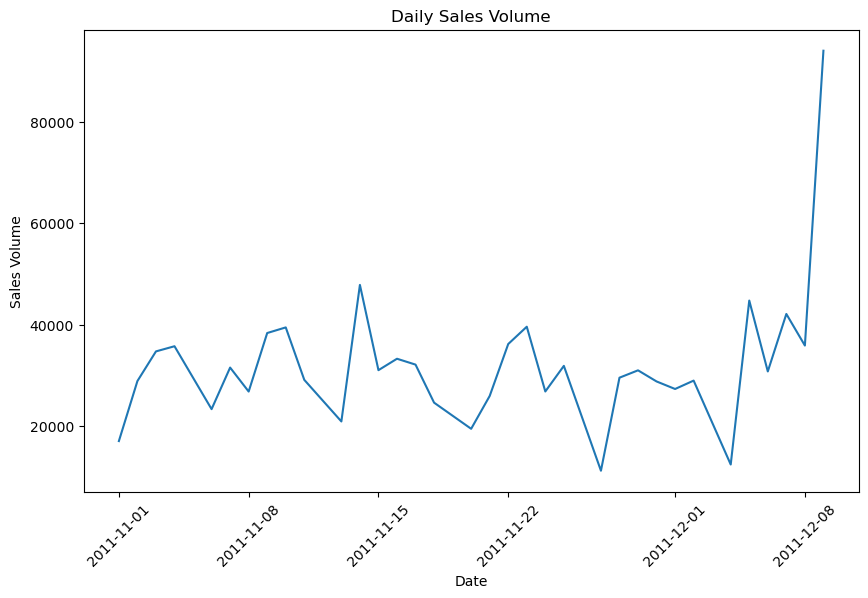

In [ ]:
# Extract the date and time components from the 'InvoiceDate' column
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

# Group the data by date and calculate the total sales volume for each day
daily_sales_volume = df.groupby('Date')['Quantity'].sum()

# Group the data by week and calculate the average revenue for each week
weekly_average_revenue = df.resample('W', on='InvoiceDate')['Revenue'].mean()

# Group the data by month and calculate the total revenue for each month
monthly_total_revenue = df.resample('M', on='InvoiceDate')['Revenue'].sum()

# Create a line chart of the daily sales volume
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_volume.index, daily_sales_volume.values)
plt.title('Daily Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.show()


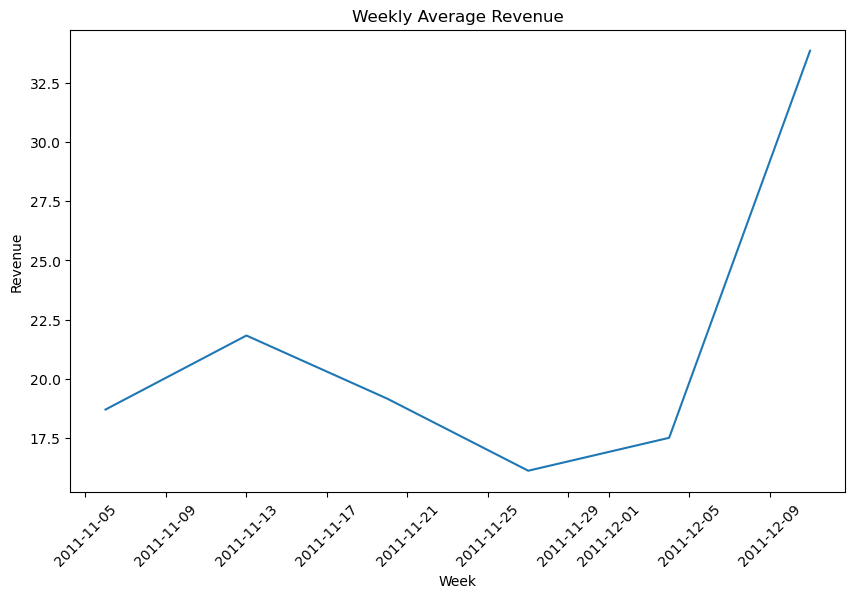

In [ ]:
# Create a line chart of the weekly average revenue
plt.figure(figsize=(10, 6))
plt.plot(weekly_average_revenue.index, weekly_average_revenue.values)
plt.title('Weekly Average Revenue')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

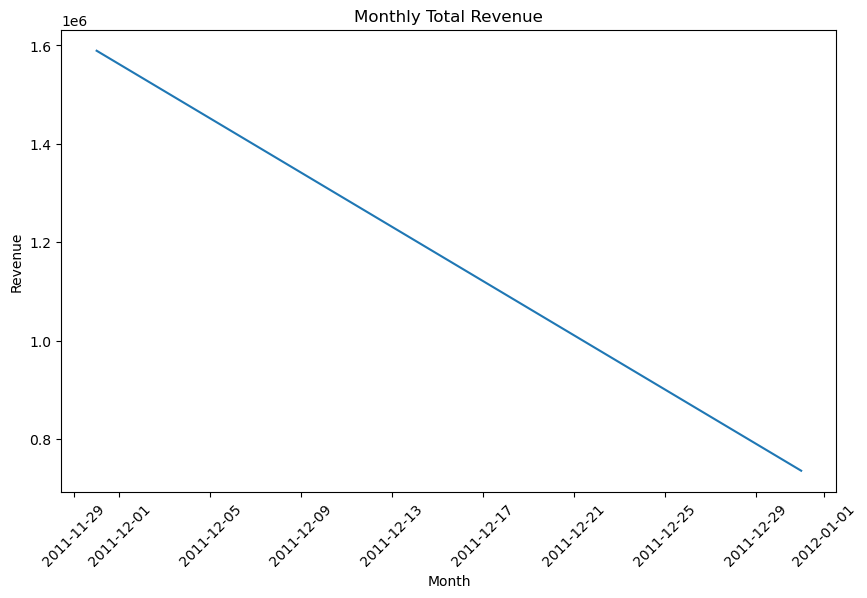

In [ ]:
# Create a line chart of the monthly total revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_revenue.index, monthly_total_revenue.values)
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

- The initial chart which is line chart illustrates the sales volume for both November and December of 2011. Revenue surpassed 80,000 in December 2011, with a notable increase occurring between December 1st and December 8th, culminating in the highest revenue on December 8th, 2011.

- The second chart mirrors these trends on a weekly basis. Revenue began to rise between December 1st and December 5th, following a dip on November 13th, 2011. The week with the highest average revenue was recorded at over 32.5, while the lowest was observed on November 27th, 2011.


- In terms of total monthly revenue for November and December 2011, the highest figure was achieved on November 29th.

In [ ]:
# determine the long-term value of customers, identify high-value customers, 
# and develop strategies to retain and maximize their value# Calculate revenue per customer.
df['Quantity'] * df['UnitPrice']

# Calculate CLV using the formula: CLV = (Revenue per customer * Average customer lifespan)
# For simplicity, we will assume the average customer lifespan is 3 years
clv = df.groupby('CustomerID')['Revenue'].sum() * 3

# Sort customers by CLV in descending order
clv = clv.sort_values(ascending=False)

# Print the top 10 high-value customers
print(clv.head(10))


CustomerID
Unknown    1821347.97
16446.0     505427.52
14096.0     150735.21
14646.0     111310.29
14911.0      90019.38
17450.0      88324.35
18102.0      80449.86
17511.0      63128.52
17389.0      54714.42
14088.0      50554.83
Name: Revenue, dtype: float64


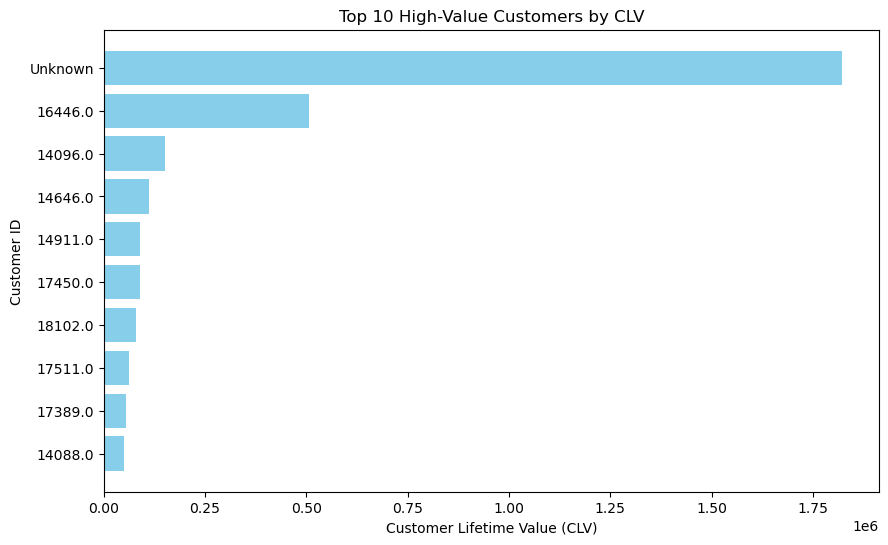

In [ ]:
top_10_customers = clv.head(10)

# Extract customer IDs and CLV values
customer_ids = top_10_customers.index
clv_values = top_10_customers.values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(customer_ids, clv_values, color='skyblue')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Customer ID')
plt.title('Top 10 High-Value Customers by CLV')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest CLV at the top

# Show the plot
plt.show()


- The chart reveals that the top 10 customers were responsible for generating over 5 million in revenue. The highest-spending customer made purchases totaling 1,821,347.97 with the company, followed by the second-highest spender at 505,427.52, and the lowest among the top 10 generated 50,554.83. This underscores the fact that a small group of customers holds significant value for the online store.